In [2]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

result = h5py.File('log/re_conv_record_iter100.h5','r')
length = result['mean_rew_lr_curve'].shape[0]

In [3]:
import slow_down_cdf
import parameters
import numpy as np
pa = parameters.Parameters()
pa.simu_len = 20
pa.num_ex = 5
ref_rewards,ref_slow_down = slow_down_cdf.launch(pa,render=False)

print '\n---------- Total Discount Rewards ----------'
print 'Random2: ' + str(np.average(ref_rewards['Random2']))
print 'SJF2: ' + str(np.average(ref_rewards['SJF2']))
print 'Packer2: ' + str(np.average(ref_rewards['Packer2']))
print 'Tetris2: ' + str(np.average(ref_rewards['Tetris2']))


# print sd[1]['Random2']
# print np.average(np.concatenate(sd[1]['Random2']))
print '\n---------- Average Job Slowdown ----------'
print 'Random2: ' + str(np.average(np.concatenate(ref_slow_down['Random2'])))
print 'SJF2: ' + str(np.average(np.concatenate(ref_slow_down['SJF2'])))
print 'Packer2: ' + str(np.average(np.concatenate(ref_slow_down['Packer2'])))
print 'Tetris2: ' + str(np.average(np.concatenate(ref_slow_down['Tetris2'])))


/Users/chenweijia/Documents/code/reinforcement-learning/rl/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Load on # 0 resource dimension is 1.561
Load on # 1 resource dimension is 1.367



=============== 0 ===============
---------- Random2 -----------
total discount reward : 	 -71.1
---------- Packer2 -----------
total discount reward : 	 -29.3333333333
---------- Tetris2 -----------
total discount reward : 	 -62.1666666667
---------- SJF2 -----------
total discount reward : 	 -29.8333333333



=============== 1 ===============
---------- Random2 -----------
total discount reward : 	 -68.8794538795
---------- Packer2 -----------
total discount reward : 	 -28.9173326673
---------- Tetris2 -----------
total discount reward : 	 -39.3871128871
---------- SJF2 -----------
total discount reward : 	 -23.833999334



=============== 2 ===============
---------- Random2 -----------
total discount reward : 	 -32.1128205128
---------- Packer2 -----------
total discount reward : 	 -21.6615384615
---------- Tetris2 -----------
total discount reward : 	 -29.5615384615
---------- SJF2 -----------
total

/Users/chenweijia/Documents/code/reinforcement-learning/rl/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


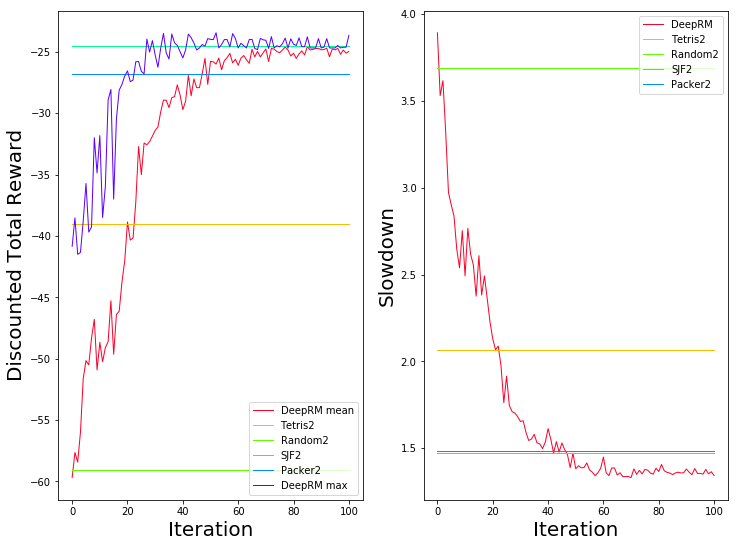

In [4]:
%matplotlib inline

num_colors = 4+2
# cm = plt.get_cmap('gist_rainbow')
cm = plt.get_cmap('gist_rainbow')

fig = plt.figure(figsize=(12, 9))

ax = fig.add_subplot(121)
ax.set_color_cycle([cm(1. * i / num_colors) for i in range(num_colors)])

ax.plot(result['mean_rew_lr_curve'][:length], linewidth=1, label='DeepRM mean')
for i in ref_rewards:
    ax.plot(np.tile(np.average(ref_rewards[i]),length), linewidth=1, label=i)
ax.plot(result['max_rew_lr_curve'][:length], linewidth=1, label='DeepRM max')


plt.legend(loc=4)
plt.xlabel("Iteration", fontsize=20)
plt.ylabel("Discounted Total Reward", fontsize=20)

ax = fig.add_subplot(122)
ax.set_color_cycle([cm(1. * i / num_colors) for i in range(num_colors)])


ax.plot(result['slow_down_lr_curve'][:length], linewidth=1, label='DeepRM')
for i in ref_slow_down:
    ax.plot(np.tile(np.average(np.concatenate(ref_slow_down[i])),length), linewidth=1, label=i)

plt.legend(loc=1)
plt.xlabel("Iteration", fontsize=20)
plt.ylabel("Slowdown", fontsize=20)

plt.show()

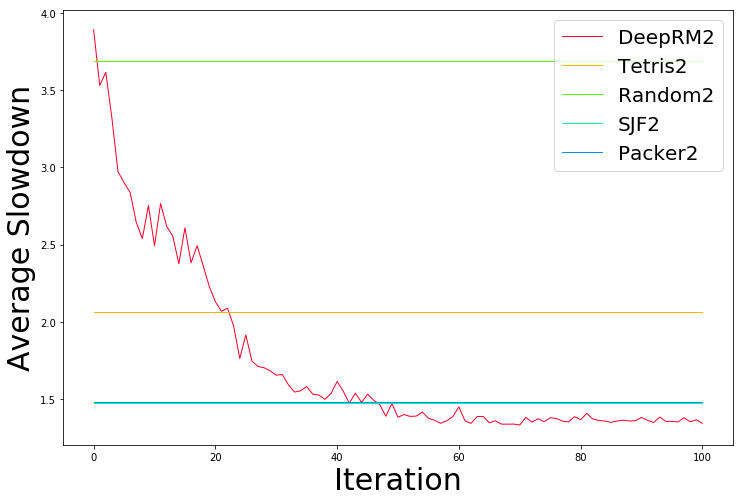

In [5]:
%matplotlib inline

num_colors = 4+2
# cm = plt.get_cmap('gist_rainbow')
cm = plt.get_cmap('gist_rainbow')

fig = plt.figure(figsize=(12, 8))

# ax = fig.add_subplot(121)
# ax.set_color_cycle([cm(1. * i / num_colors) for i in range(num_colors)])

# ax.plot(result['mean_rew_lr_curve'][:length], linewidth=1, label='DeepRM mean')
# for i in ref_rewards:
#     ax.plot(np.tile(np.average(ref_rewards[i]),length), linewidth=1, label=i)
# ax.plot(result['max_rew_lr_curve'][:length], linewidth=1, label='DeepRM max')


# plt.legend(loc=4)
# plt.xlabel("Iteration", fontsize=20)
# plt.ylabel("Discounted Total Reward", fontsize=20)

ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1. * i / num_colors) for i in range(num_colors)])


ax.plot(result['slow_down_lr_curve'][:length], linewidth=1, label='DeepRM2')
for i in ref_slow_down:
    ax.plot(np.tile(np.average(np.concatenate(ref_slow_down[i])),length), linewidth=1, label=i)

plt.legend(loc=1,fontsize=20)
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("Average Slowdown", fontsize=30)

plt.show()